In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv("movie_success_rate.csv")


In [3]:
print(df.head())

   Rank                    Title                     Genre  \
0   1.0  Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1   2.0               Prometheus  Adventure,Mystery,Sci-Fi   
2   3.0                    Split           Horror,Thriller   
3   4.0                     Sing   Animation,Comedy,Family   
4   5.0            Suicide Squad  Action,Adventure,Fantasy   

                                         Description              Director  \
0  A group of intergalactic criminals are forced ...            James Gunn   
1  Following clues to the origin of mankind, a te...          Ridley Scott   
2  Three girls are kidnapped by a man with a diag...    M. Night Shyamalan   
3  In a city of humanoid animals, a hustling thea...  Christophe Lourdelet   
4  A secret government agency recruits some of th...            David Ayer   

                                              Actors    Year  \
0  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...  2014.0   
1  Noomi Rapace, Logan Marshal

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839 entries, 0 to 838
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                838 non-null    float64
 1   Title               838 non-null    object 
 2   Genre               838 non-null    object 
 3   Description         838 non-null    object 
 4   Director            838 non-null    object 
 5   Actors              838 non-null    object 
 6   Year                838 non-null    float64
 7   Runtime (Minutes)   838 non-null    float64
 8   Rating              839 non-null    float64
 9   Votes               839 non-null    float64
 10  Revenue (Millions)  839 non-null    float64
 11  Metascore           838 non-null    float64
 12  Action              838 non-null    float64
 13  Adventure           838 non-null    float64
 14  Aniimation          838 non-null    float64
 15  Biography           838 non-null    float64
 16  Comedy  

In [5]:
print(df.describe())

              Rank        Year  Runtime (Minutes)     Rating         Votes  \
count   838.000000   838.00000         838.000000  839.00000  8.390000e+02   
mean    485.247017  2012.50716         114.638425    6.81432  1.932303e+05   
std     286.572065     3.17236          18.470922    0.87723  1.929838e+05   
min       1.000000  2006.00000          66.000000    1.90000  1.780000e+02   
25%     238.250000  2010.00000         101.000000    6.30000  6.145500e+04   
50%     475.500000  2013.00000         112.000000    6.90000  1.371170e+05   
75%     729.750000  2015.00000         124.000000    7.50000  2.708650e+05   
max    1000.000000  2016.00000         187.000000    9.00000  1.791916e+06   

       Revenue (Millions)   Metascore      Action   Adventure  Aniimation  \
count          839.000000  838.000000  838.000000  838.000000  838.000000   
mean            84.564558   59.575179    0.330549    0.291169    0.053699   
std            104.457845   16.952416    0.470692    0.454573    0

In [6]:
# Handle missing values
df = df.dropna()

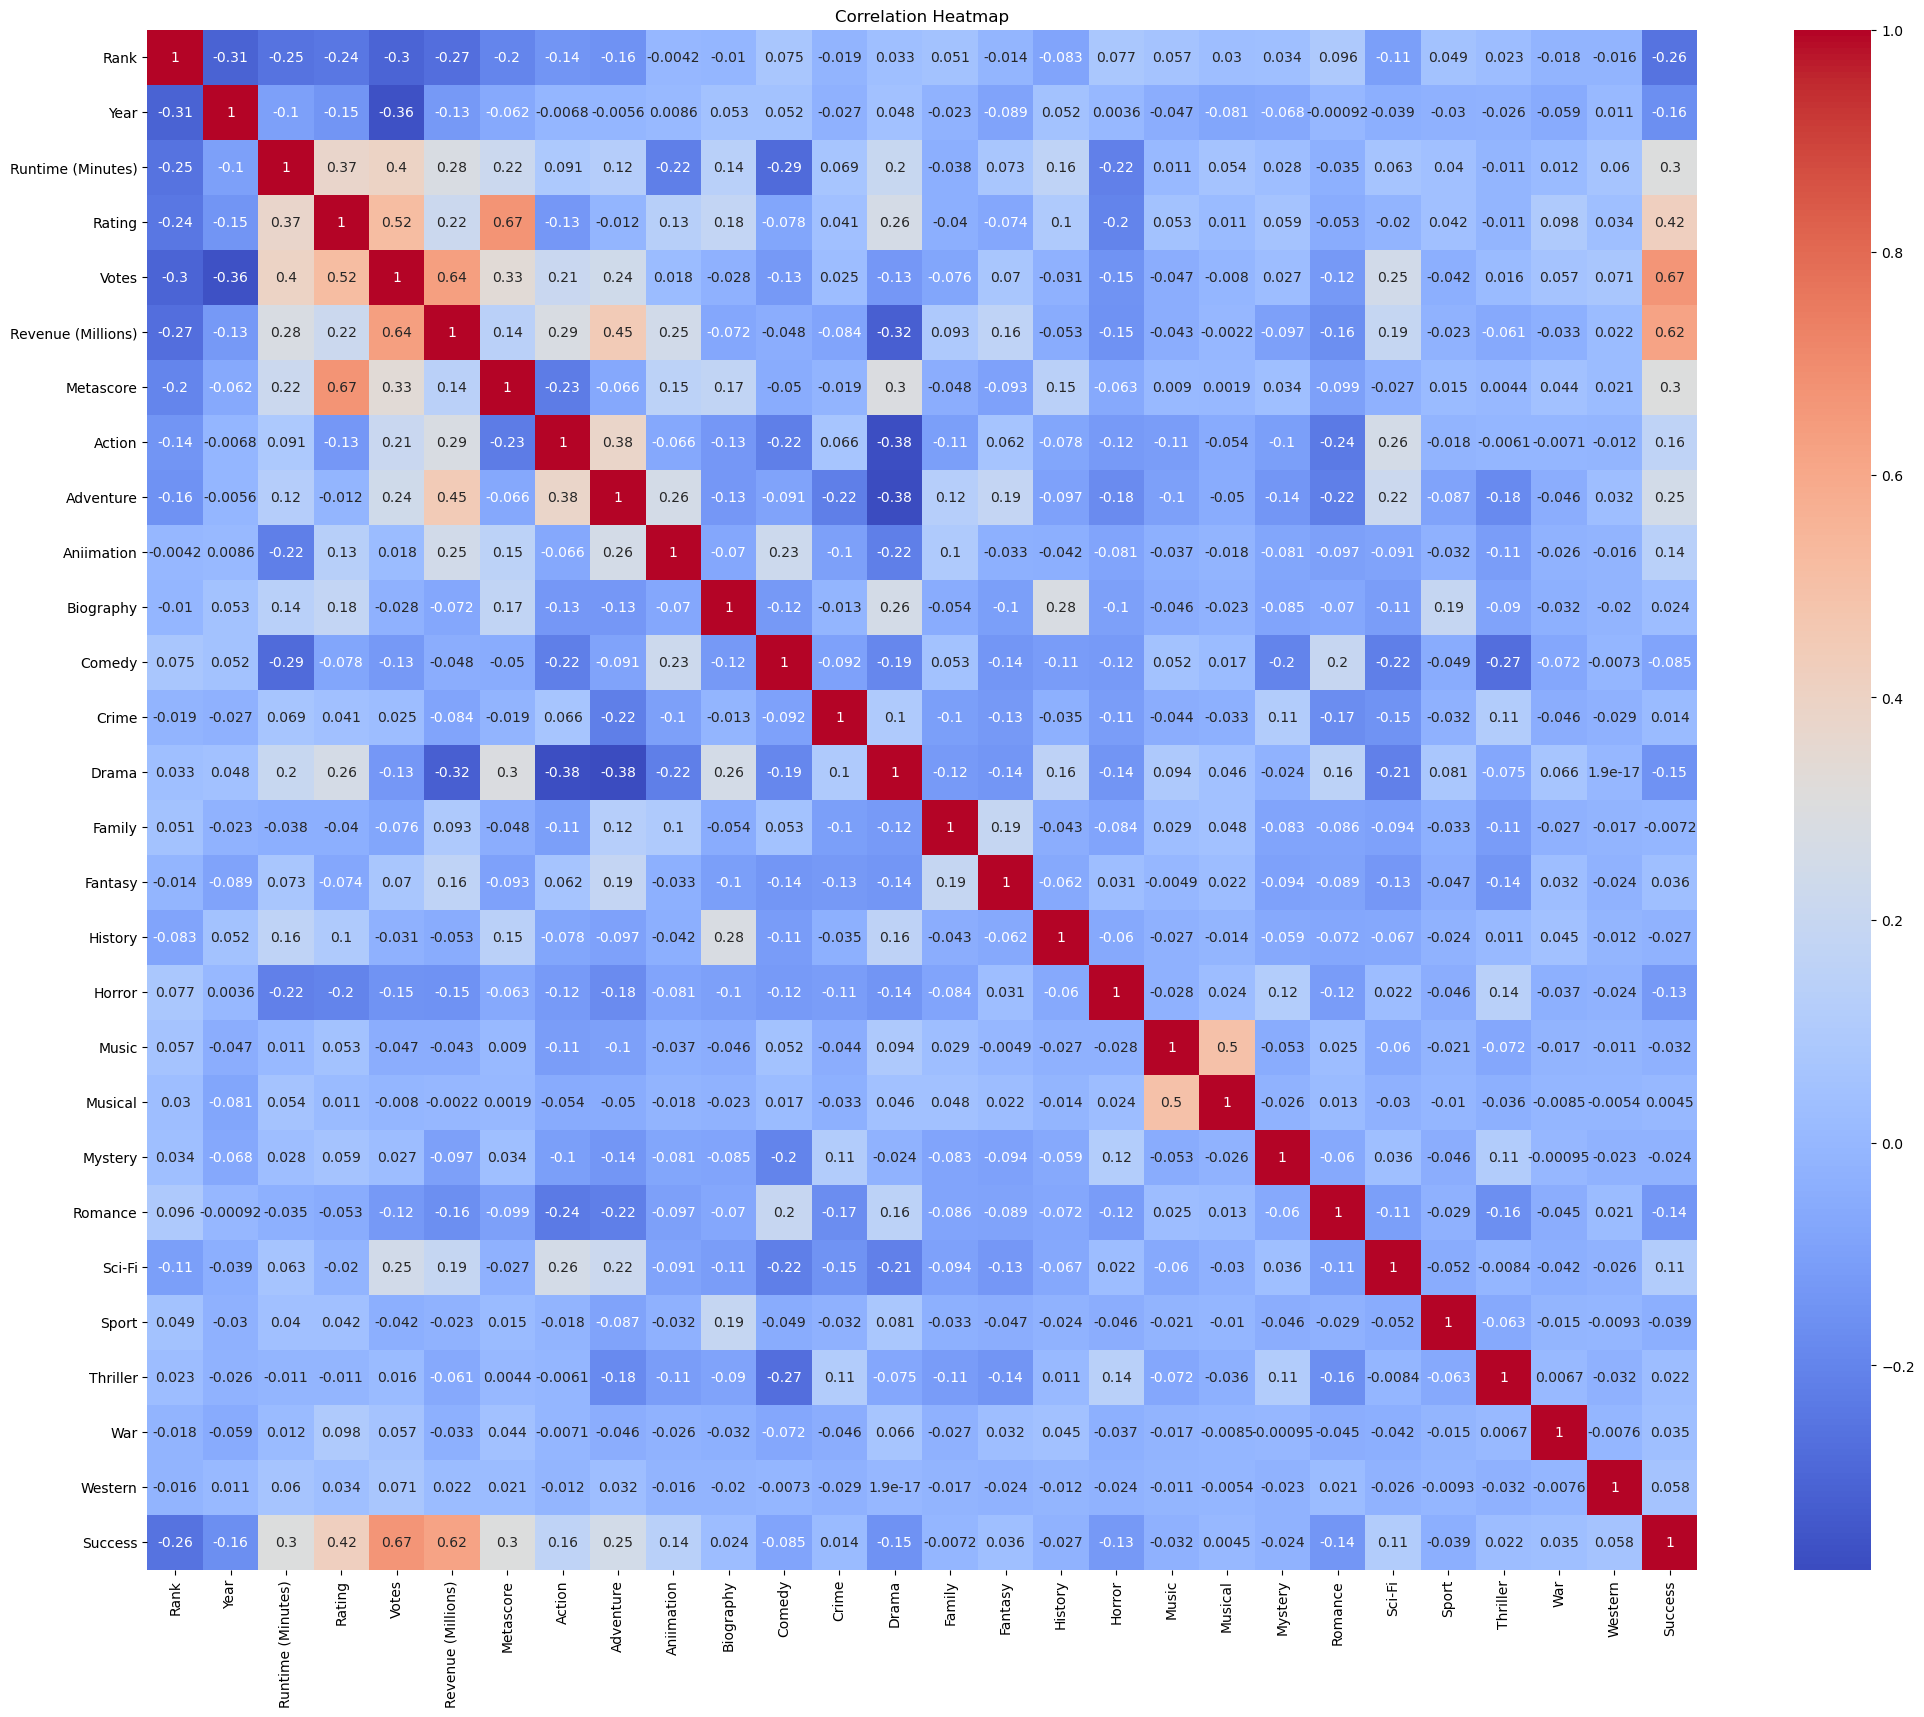

In [7]:
# Data visualization
plt.figure(figsize=(25, 20))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

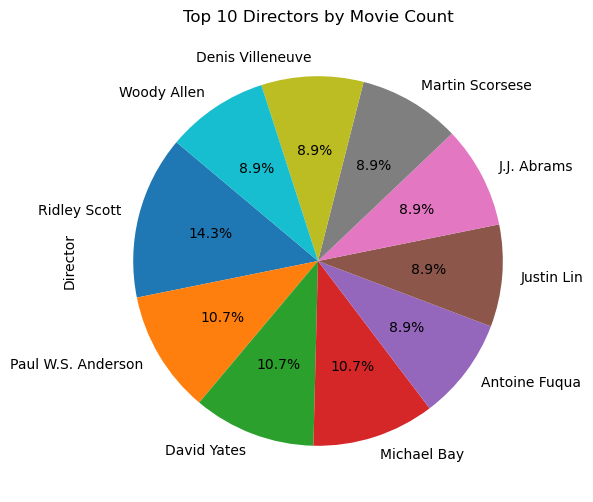

In [8]:
# Top 10 directors by movie count
top_directors = df['Director'].value_counts()[:10]
plt.figure(figsize=(10, 6))
top_directors.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Directors by Movie Count')
plt.show()

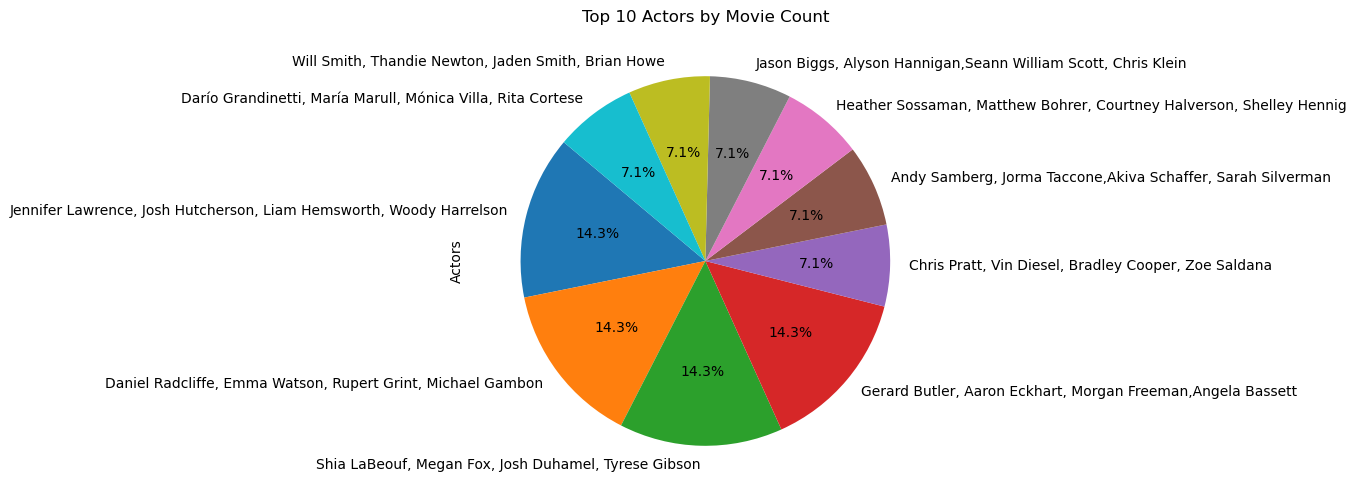

In [9]:
# Top 10 actors by movie count
top_actors = df['Actors'].value_counts()[:10]
plt.figure(figsize=(10, 6))
top_actors.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Actors by Movie Count')
plt.show()

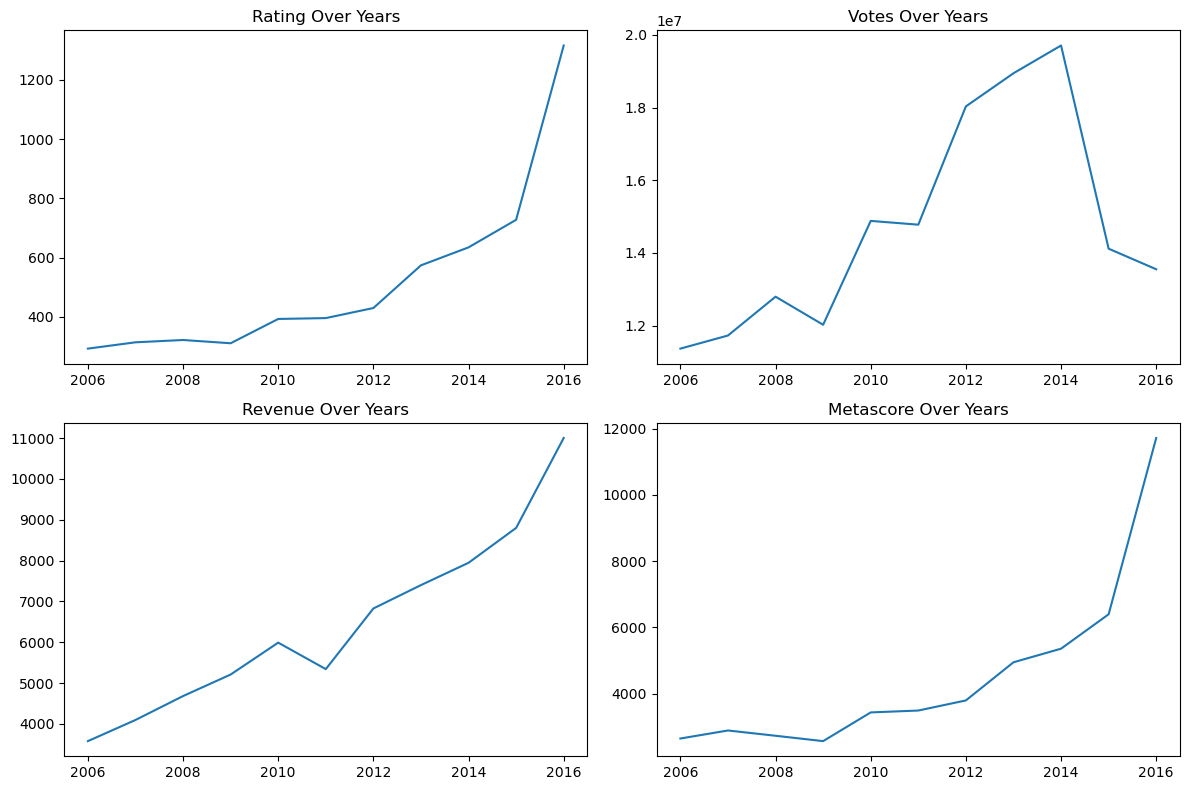

In [10]:
# Visualize trends over years
trends_by_year = df.groupby("Year").sum()[["Rating", "Votes", "Revenue (Millions)", "Metascore"]]
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(trends_by_year.index, trends_by_year["Rating"])
plt.title('Rating Over Years')

plt.subplot(2, 2, 2)
plt.plot(trends_by_year.index, trends_by_year["Votes"])
plt.title('Votes Over Years')

plt.subplot(2, 2, 3)
plt.plot(trends_by_year.index, trends_by_year["Revenue (Millions)"])
plt.title('Revenue Over Years')

plt.subplot(2, 2, 4)
plt.plot(trends_by_year.index, trends_by_year["Metascore"])
plt.title('Metascore Over Years')

plt.tight_layout()
plt.show()

In [11]:
# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [12]:
# Select features and target
x = df[['Year', 'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
        'Metascore', 'Action', 'Adventure', 'Biography', 'Comedy',
        'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music',
        'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War',
        'Western']]

y = df['Success']

In [13]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [14]:

# Standardize features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [15]:
# Initialize and train the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=60, random_state=10)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=60, random_state=10)

In [16]:
# Predictions
y_pred_rf_test = rf.predict(x_test)
y_pred_rf_train = rf.predict(x_train)

In [17]:
# Evaluate the model
test_acc_rf = accuracy_score(y_pred_rf_test, y_test)
train_acc_rf = accuracy_score(y_pred_rf_train, y_train)

print("Training Accuracy of Random Forest: ", train_acc_rf)
print("Testing Accuracy of Random Forest: ", test_acc_rf)

Training Accuracy of Random Forest:  1.0
Testing Accuracy of Random Forest:  0.9940476190476191


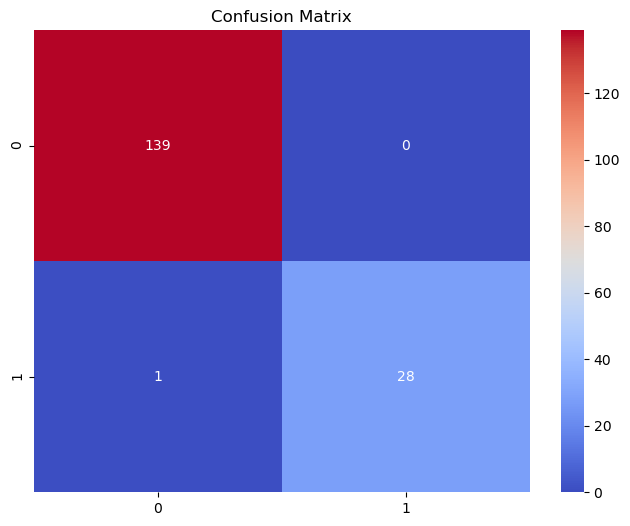

In [18]:

# Confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf_test), annot=True, fmt='d', cmap='coolwarm')
plt.title('Confusion Matrix')
plt.show()

In [19]:
# Classification report
print(classification_report(y_test, y_pred_rf_test))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       139
         1.0       1.00      0.97      0.98        29

    accuracy                           0.99       168
   macro avg       1.00      0.98      0.99       168
weighted avg       0.99      0.99      0.99       168



## Aditya Kasyap.